# Inference plots - Histogram plots

This example builds on [adaptive covariance MCMC](https://pints.readthedocs.io/en/latest/mcmc_samplers/adaptive_covariance_mc.html), and shows you how to plot the MCMC chain histograms, also known as the marginal posterior distributions.

Other inference plots:
* [Predicted time series](mcmc-predicted-time-series.ipynb)
* [Autocorrelation](mcmc-autocorrelation.ipynb)
* [Pairwise scatterplots](mcmc-pairwise-scatterplots.ipynb)

## Setting up an MCMC routine

See the adaptive covariance MCMC example for details.

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 50
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Perform sampling using MCMC, with three chains
xs = [
    real_parameters * 1.1,
    real_parameters * 1.15,
    real_parameters * 0.9,
]
mcmc = pints.MCMCController(log_posterior, 3, xs)
mcmc.set_max_iterations(6000)
mcmc.set_log_to_screen(False)

## Histograms

The plots below show the histograms of the chains generated by three independent runs of the adaptive MCMC routine (all from the same starting point). All three chains require an initial period before they converge to the same parameter values. The initial period is usually discarded as 'burn-in'.

In [2]:
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard 'burn-in'
chains = chains[:, 3000:, :]

Running...
Done!


### Simple histograms

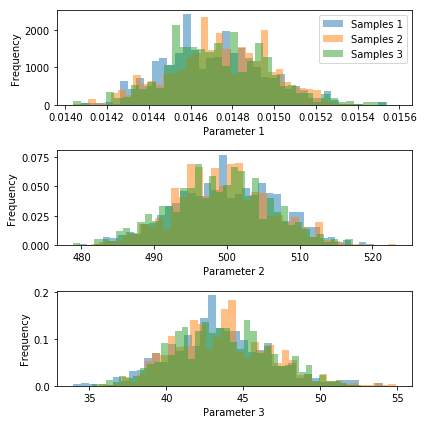

In [3]:
import pints.plot
pints.plot.histogram(chains)
plt.show()

### Histograms with KDE

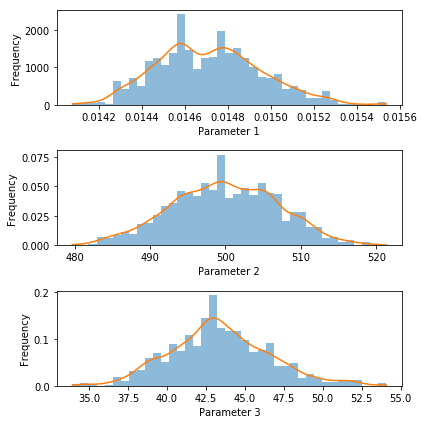

In [4]:
pints.plot.histogram([chains[0]], kde=True)
plt.show()